In [1]:
# Import libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn import preprocessing

%matplotlib inline


In [2]:
signals= pd.read_csv('dataset/bearing_signals.csv',sep=',')
labels = pd.read_csv('dataset/bearing_classes.csv',sep=';')
df=signals.copy()
pd.set_option('display.max_columns',111)
print(signals.shape)
signals.head()
signals.describe()

(10265700, 13)


,experiment_id,bearing_1_id,bearing_2_id,timestamp,a1_x,a1_y,a1_z,a2_x,a2_y,a2_z,rpm,hz,w
count,1.026570e+07,10265700.0,1.026570e+07,1.026570e+07,1.026570e+07,1.026570e+07,1.026570e+07,1.026570e+07,1.026570e+07,1.026570e+07,1.026570e+07,1.026570e+07,1.026570e+07
mean,5.658897e+01,0.0,5.658897e+01,1.556797e+01,-2.200731e-01,-4.832596e-02,-5.254890e-02,-3.124191e-01,-8.758339e-02,7.102206e-02,-2.760059e+05,-4.600098e+03,4.629741e-01
std,3.231361e+01,0.0,3.231361e+01,9.425589e+00,1.824082e+00,1.450662e+00,1.768919e+00,2.553113e+00,2.631378e+00,2.700098e+00,4.076958e+07,6.794930e+05,4.565080e-01
min,1.000000e+00,0.0,1.000000e+00,0.000000e+00,-1.604771e+01,-1.887183e+01,-1.633967e+01,-1.765083e+01,-1.873959e+01,-2.296248e+01,-6.000000e+09,-1.000000e+08,1.407501e-06
25%,2.900000e+01,0.0,2.900000e+01,7.638000e+00,-1.041087e+00,-6.073697e-01,-8.785304e-01,-1.602094e+00,-1.247228e+00,-1.040389e+00,4.774536e+02,7.957560e+00,4.778236e-02
50%,5.600000e+01,0.0,5.600000e+01,1.527633e+01,-1.753203e-01,-3.956274e-02,-1.424326e-02,-3.748382e-01,2.226305e-03,5.571547e-02,1.285714e+03,2.142857e+01,3.781180e-01
75%,8.500000e+01,0.0,8.500000e+01,2.291433e+01,5.942500e-01,5.282442e-01,8.500439e-01,8.524177e-01,8.672333e-01,1.151820e+00,1.487603e+03,2.479339e+01,7.271071e-01
max,1.120000e+02,0.0,1.120000e+02,5.549967e+01,1.560087e+01,1.614294e+01,1.640721e+01,1.916685e+01,2.249241e+01,2.596364e+01,9.000135e+04,1.500023e+03,9.393605e+00


In [3]:
print(df.info())
for col in df.select_dtypes('int64'):
    print(f'{col:-<50}\n{df[col].unique()}')
    
for col in df.select_dtypes('float64'):
    print(f'{col:-<50} %values_null,\n{(df[col]==0).sum()/df.shape[0]}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10265700 entries, 0 to 10265699
Data columns (total 13 columns):
 #   Column         Dtype  
---  ------         -----  
 0   experiment_id  int64  
 1   bearing_1_id   int64  
 2   bearing_2_id   int64  
 3   timestamp      float64
 4   a1_x           float64
 5   a1_y           float64
 6   a1_z           float64
 7   a2_x           float64
 8   a2_y           float64
 9   a2_z           float64
 10  rpm            float64
 11  hz             float64
 12  w              float64
dtypes: float64(10), int64(3)
memory usage: 1018.2 MB
None
experiment_id-------------------------------------
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  8

(10265700, 13)


<AxesSubplot:>

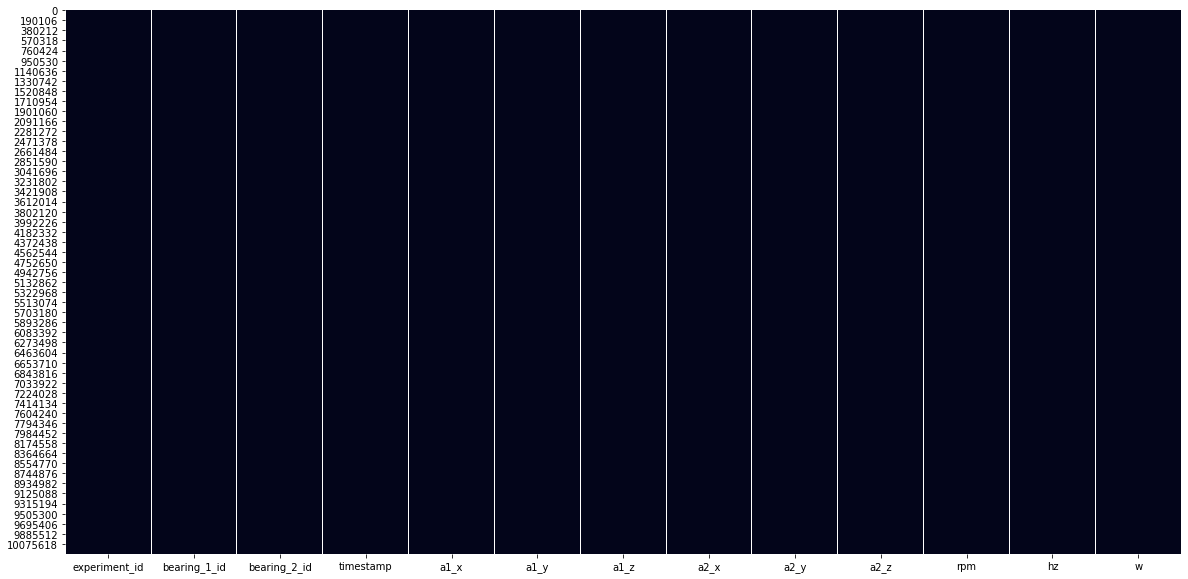

In [4]:
# Analyse df
# plot isna()
print(df.shape) #(10265700, 13)
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(), cbar=False)

In [5]:
print((df.isna().sum()/df.shape[0]).sort_values(ascending=True))
# there is no na

experiment_id    0.0
bearing_1_id     0.0
bearing_2_id     0.0
timestamp        0.0
a1_x             0.0
a1_y             0.0
a1_z             0.0
a2_x             0.0
a2_y             0.0
a2_z             0.0
rpm              0.0
hz               0.0
w                0.0
dtype: float64


In [6]:
############################
# Decision after observation:
#  DataFrame     : no NA
# 'bearing_1_id' : values are always=0 --> It can drop
# 'bearing_2_id' : values are the same as  'experiment_id' --> It can drop
# 'rpm'          : speed is double use with 'hz' --> we drop 'rpm'
# 'hz'           : 3,5 % of rows is zero   --> we delete them to make our model more accurate
# 'hz'           : >27 Hz is out of the test(outliers) --> we remove them to make our model more accurate
# 'experiment_id': values are unique, it could transform to index
############################

In [7]:
# drop columns
df.drop(columns=['bearing_1_id','bearing_2_id','rpm'],inplace=True)
print(df.shape)
df.head()

(10265700, 10)


,experiment_id,timestamp,a1_x,a1_y,a1_z,a2_x,a2_y,a2_z,hz,w
0,1,0.000000,0.113269,0.149706,-0.110275,-0.186030,0.194450,0.454299,0.0,0.000006
1,1,0.000333,-0.367713,-0.228832,0.177821,0.285992,0.002226,-0.043930,0.0,0.000243
2,1,0.000667,0.113269,0.149706,-0.398371,-0.091625,0.002226,0.454299,0.0,0.000369
3,1,0.001000,-0.175320,-0.228832,-0.110275,0.285992,0.002226,0.255007,0.0,0.000520
4,1,0.001333,-0.079124,0.055072,-0.110275,0.191588,0.002226,0.255007,0.0,0.000175


In [8]:
# 'hz'           : 3,5 % of rows is null   --> we delete them to make our model more accurate
df=df[df['hz'].values !=0]
# 'hz'           : remove 'Hz'>27 Hz
df=df[df['hz'].values <27]
print(df.shape)

(9894316, 10)


In [9]:
######################
# Feature engineering:
# transform df to make new columns:

df_trans=df.groupby(['experiment_id']).agg(['min','max','mean','std','median'])
print(df_trans.shape)
df_trans


(112, 45)


timestamp                                                 a1_x  \
                    min        max       mean       std     median       min   
experiment_id                                                                  
1              1.637333  28.399667  15.018500  7.725765  15.018500 -9.410165   
2              0.491667  29.099667  14.795667  8.258563  14.795667 -7.582435   
3              0.933000  26.199667  13.566333  7.294003  13.566333 -8.352005   
4              1.617667  26.999667  14.308667  7.327297  14.308667 -6.524276   
5              2.176667  29.899667  16.038167  8.003085  16.038167 -7.967220   
...                 ...        ...        ...       ...        ...       ...   
108            0.236667  34.599667  17.418167  9.919888  17.418167 -8.352005   
109            1.172333  31.399667  16.286000  8.726024  16.286000 -6.909061   
110            1.512333  29.299667  15.406000  8.021657  15.406000 -9.025379   
111            1.100000  32.499667  16.799833  9.064447  16.799833 -7.197650   
112            0.420000  32.099667  16.259833  9.145276  16.259833 -8.352005   

                                                            a1_y            \
                     max      mean       std    median       min       max   
experiment_id                                                                
1               7.327991 -0.182339  1.800587 -0.175320 -4.298115  5.638507   
2               7.424187 -0.175244  1.573574 -0.175320 -4.676653  4.881431   
3               7.231794 -0.175061  1.669721 -0.175320 -4.108846  5.449238   
4               5.981243 -0.153161  1.488283 -0.175320 -4.676653  4.881431   
5               6.750813 -0.151828  1.566350 -0.079124 -4.676653  6.206314   
...                  ...       ...       ...       ...       ...       ...   
108             7.231794 -0.145664  1.641794 -0.079124 -6.947881  6.679486   
109             7.520383 -0.127413  1.333910 -0.079124 -6.001536  4.786797   
110            10.598665 -0.137704  1.714771 -0.175320 -6.190805  4.313624   
111             8.867131 -0.128517  1.523511 -0.079124 -4.771288  4.313624   
112             9.059524 -0.154762  1.513017 -0.175320 -5.717632  4.881431   

                                                  a1_z                       \
                   mean       std    median        min        max      mean   
experiment_id                                                                 
1             -0.002968  1.106395 -0.039563  -8.657115   9.204820 -0.030657   
2             -0.007854  0.952555  0.055072  -8.080924   8.340533 -0.051817   
3             -0.002737  1.033300  0.055072  -8.369019   8.052437 -0.036211   
4             -0.001504  0.981190 -0.039563  -7.024573   8.148469 -0.031887   
5              0.014526  1.024749  0.055072  -8.849179   8.340533 -0.018326   
...                 ...       ...       ...        ...        ...       ...   
108            0.026511  1.423120  0.055072 -10.961881   9.204820  0.120669   
109            0.077192  0.997404  0.055072 -10.001562   9.012756  0.221760   
110            0.079491  1.284562  0.149706  -9.425370  10.069107  0.217483   
111            0.090946  1.062158  0.149706  -9.233306   9.877043  0.225266   
112            0.087072  1.049362  0.149706 -10.289657   9.973075  0.233797   

                                        a2_x                                 \
                    std    median        min        max      mean       std   
experiment_id                                                                 
1              1.739719 -0.014243 -10.004077   8.687975  0.112452  2.524144   
2              1.560769 -0.014243  -9.437651   8.310358 -0.179232  2.210734   
3              1.621235 -0.014243 -12.080972   9.632018 -0.122575  2.473349   
4              1.584313 -0.014243 -10.004077   7.649527 -0.121190  2.370054   
5              1.701118 -0.014243 -11.325737   9.254401 -0.081950  2.397928   
...                 ...       ...        ...        ...      

In [10]:

# Add column target: 'status' 0=bad 1=good
df_trans['status']=df_trans.index.values>100
df_trans['status']=df_trans['status'].replace([False,True],[0,1])
# choose only the dataFrame with 'stastus=0' to make the cluster_model:
df_trans=df_trans[df_trans['status']==0]
print(df_trans.shape)
df_trans.tail(15)

(100, 46)


timestamp                                                  a1_x  \
                    min        max       mean        std     median       min   
experiment_id                                                                   
86             0.241333  27.399667  13.820500   7.840080  13.820500 -6.043294   
87             1.591333  29.999667  15.795500   8.200924  15.795500 -9.698754   
88             0.875667  28.399667  14.637667   7.945639  14.637667 -7.678631   
89             1.784667  29.799667  15.792167   8.087378  15.792167 -7.678631   
90             1.072333  29.399667  15.236000   8.177541  15.236000 -8.063416   
91             1.023333  29.399667  15.211500   8.191686  15.211500 -8.063416   
92             1.869667  26.099667  13.984667   6.994743  13.984667 -7.197650   
93             0.784000  31.699667  16.241833   8.924729  16.241833 -7.197650   
94             1.669000  32.499667  17.084333   8.900191  17.084333 -7.774828   
95             0.747667  32.999667  16.873667   9.310495  16.873667 -7.101454   
96             1.784000  32.099667  16.941833   8.751523  16.941833 -7.390042   
97             2.975333  38.099667  20.537500  10.139666  20.537500 -7.197650   
98             1.443000  30.799667  16.121333   8.474684  16.121333 -8.736791   
99             3.505667  33.999667  18.752667   8.803004  18.752667 -7.486239   
100            0.698000  26.699667  13.698833   7.506179  13.698833 -8.063416   

                                                           a1_y            \
                    max      mean       std    median       min       max   
experiment_id                                                               
86             6.173635 -0.233730  1.295026 -0.175320 -4.487384  4.408259   
87             8.578542 -0.276664  1.566976 -0.175320 -6.758612  6.206314   
88             7.616580 -0.270766  1.741492 -0.271517 -6.096170  6.206314   
89             7.039402 -0.239157  1.443673 -0.175320 -3.824943  4.597528   
90             7.520383 -0.241122  1.642565 -0.175320 -4.487384  5.165335   
91             7.327991 -0.338833  1.634679 -0.271517 -4.960557  6.584852   
92             6.558420 -0.245603  1.475161 -0.175320 -4.203481  5.449238   
93             6.366028 -0.231409  1.292928 -0.175320 -4.298115  4.408259   
94             8.963328 -0.222240  1.513886 -0.175320 -4.771288  4.692162   
95             6.847009 -0.229008  1.446597 -0.175320 -4.108846  5.070700   
96             7.712776 -0.234976  1.590519 -0.175320 -5.622998  5.733142   
97             7.135598 -0.218179  1.450583 -0.175320 -4.771288  5.070700   
98             6.847009 -0.250744  1.565271 -0.175320 -6.001536  6.395583   
99             6.654617 -0.247468  1.479452 -0.175320 -4.487384  4.408259   
100            7.135598 -0.238013  1.635703 -0.175320 -4.298115  5.259969   

                                                  a1_z                      \
                   mean       std    median        min       max      mean   
experiment_id                                                                
86            -0.012845  0.886472 -0.039563  -9.233306  9.012756  0.088309   
87            -0.015019  1.082262 -0.039563 -10.289657  8.916724  0.068204   
88            -0.013005  1.241887 -0.039563  -9.713466  8.340533  0.070719   
89            -0.019976  0.865159 -0.039563  -8.753147  8.436565  0.072297   
90            -0.016276  1.088244 -0.039563  -8.657115  9.877043  0.055234   
91            -0.022282  1.155702 -0.039563  -8.080924  9.012756  0.089329   
92            -0.009460  1.107558 -0.039563  -9.041243  9.396884  0.078368   
93            -0.014536  0.798692 -0.039563  -9.041243  9.300852  0.067917   
94            -0.013920  0.902900 -0.039563  -8.561083  9.973075  0.049836   
95            -0.012925  0.945642 -0.039563  -8.080924  9.108788  0.050033   
96            -0.004466  1.033546  0.055072  -8.849179  9.396884  0.059153   
97            -0.008979  0.979421 -0.039563  -8.080924  9.204820  0.047019  

In [11]:
new_cols = [''.join(t) for t in df_trans.columns]
df_trans.columns = new_cols
df_trans.tail()

,timestampmin,timestampmax,timestampmean,timestampstd,timestampmedian,a1_xmin,a1_xmax,a1_xmean,a1_xstd,a1_xmedian,a1_ymin,a1_ymax,a1_ymean,a1_ystd,a1_ymedian,a1_zmin,a1_zmax,a1_zmean,a1_zstd,a1_zmedian,a2_xmin,a2_xmax,a2_xmean,a2_xstd,a2_xmedian,a2_ymin,a2_ymax,a2_ymean,a2_ystd,a2_ymedian,a2_zmin,a2_zmax,a2_zmean,a2_zstd,a2_zmedian,hzmin,hzmax,hzmean,hzstd,hzmedian,wmin,wmax,wmean,wstd,wmedian,status
experiment_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
96,1.784000,32.099667,16.941833,8.751523,16.941833,-7.390042,7.712776,-0.234976,1.590519,-0.17532,-5.622998,5.733142,-0.004466,1.033546,0.055072,-8.849179,9.396884,0.059153,1.688103,0.081789,-10.664907,9.537613,-0.739569,2.304861,-0.752455,-4.995592,7.114506,0.007666,1.436297,0.002226,-11.602852,14.404721,0.107798,2.902009,-0.04393,0.560538,25.210084,17.258509,8.344437,21.428571,0.000001,1.799549,0.464658,0.386117,0.522730,0
97,2.975333,38.099667,20.537500,10.139666,20.537500,-7.197650,7.135598,-0.218179,1.450583,-0.17532,-4.771288,5.070700,-0.008979,0.979421,-0.039563,-8.080924,9.204820,0.047019,1.564232,-0.014243,-11.608950,7.460719,-0.717670,2.152934,-0.658051,-5.668375,9.132855,0.009227,1.349952,0.002226,-15.489041,15.301534,0.102780,2.431133,-0.04393,0.336097,25.210084,16.005510,9.069187,19.736842,0.000001,1.907451,0.322817,0.306919,0.310546,0
98,1.443000,30.799667,16.121333,8.474684,16.121333,-8.736791,6.847009,-0.250744,1.565271,-0.17532,-6.001536,6.395583,-0.010438,1.101604,-0.039563,-9.809498,8.724660,0.072659,1.667341,0.081789,-10.476099,7.271910,-0.671715,2.115567,-0.563647,-5.668375,8.171736,0.012055,1.314214,0.002226,-11.602852,14.803305,0.214595,2.907374,-0.04393,0.693001,25.210084,17.612494,8.261921,22.222222,0.000001,1.761091,0.306244,0.270422,0.294691,0
99,3.505667,33.999667,18.752667,8.803004,18.752667,-7.486239,6.654617,-0.247468,1.479452,-0.17532,-4.487384,4.408259,-0.026270,0.836453,0.055072,-9.425370,8.820692,0.037212,1.631154,0.081789,-8.304800,8.404762,-0.664048,1.822723,-0.658051,-5.572263,5.768939,0.015312,1.255381,0.002226,-12.001435,15.002597,0.182460,2.653999,-0.04393,0.285252,25.210084,17.242678,8.357893,21.582734,0.000001,1.877711,0.478284,0.383520,0.559835,0
100,0.698000,26.699667,13.698833,7.506179,13.698833,-8.063416,7.135598,-0.238013,1.635703,-0.17532,-4.298115,5.259969,-0.026511,1.056529,-0.039563,-8.369019,9.973075,0.015148,1.575044,-0.014243,-8.115991,7.460719,-0.693459,1.972546,-0.752455,-7.110053,7.402841,0.009100,2.049094,0.002226,-11.702498,13.109325,0.224139,3.443542,-0.04393,1.432665,25.210084,19.431741,6.938338,23.809524,0.000001,2.293446,0.444871,0.308222,0.462081,0


Text(0.5, 6.800000000000029, 'Speed of bearing 1, axis y [m/s^2]')

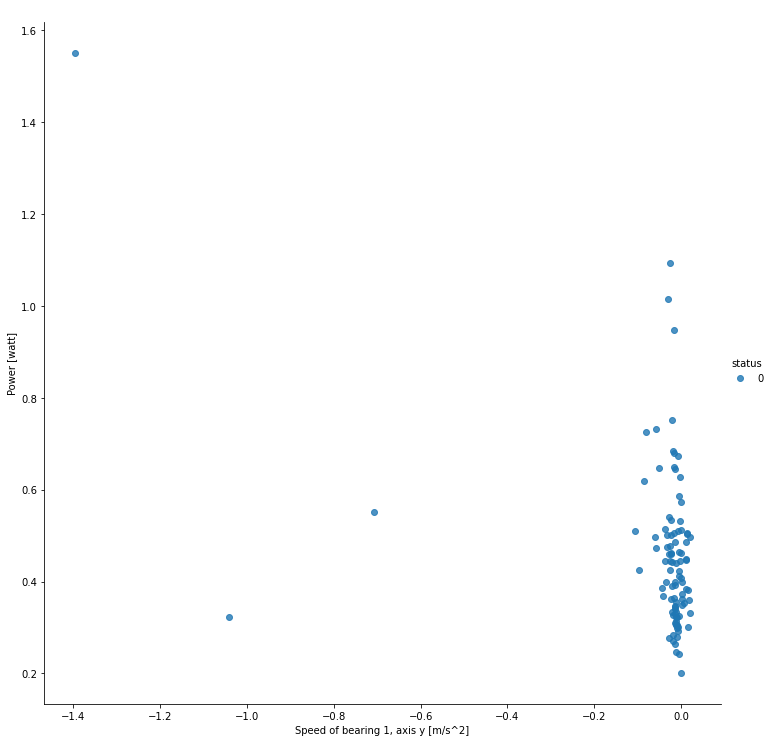

In [12]:
import matplotlib.pyplot as plt

# plot size metrics
sns.lmplot(x='a1_ymean', y='wmean',  height=10, data=df_trans,
           fit_reg=False, hue='status')
plt.title(" ")
plt.ylabel("Power [watt]")
plt.xlabel("Speed of bearing 1, axis y [m/s^2]")

C:\Users\acer.LAPTOP-OODPR6CI\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\acer.LAPTOP-OODPR6CI\anaconda3\lib\site-packages\seaborn\regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(9.599088541666667, 0.5, 'Acceleration of bearing 2 [m/s^2]')

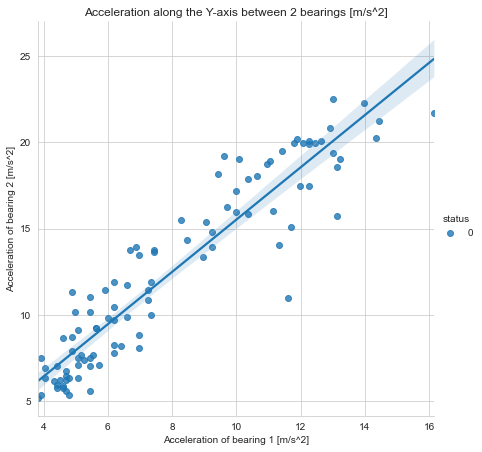

In [13]:
sns.set_style('whitegrid')
sns.lmplot('a1_ymax','a2_ymax',data=df_trans, hue='status',size=6,aspect=1,fit_reg=True)
plt.title('Acceleration along the Y-axis between 2 bearings [m/s^2]')
plt.xlabel('Acceleration of bearing 1 [m/s^2]')
plt.ylabel('Acceleration of bearing 2 [m/s^2]')

C:\Users\acer.LAPTOP-OODPR6CI\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\acer.LAPTOP-OODPR6CI\anaconda3\lib\site-packages\seaborn\regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(9.599088541666667, 0.5, 'Acceleration of bearing 2 [m/s^2]')

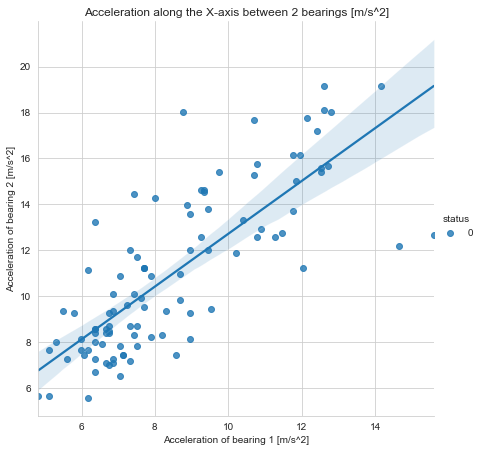

In [14]:
sns.set_style('whitegrid')
sns.lmplot('a1_xmax','a2_xmax',data=df_trans, hue='status'
           ,size=6,aspect=1,fit_reg=True)
plt.title('Acceleration along the X-axis between 2 bearings [m/s^2]')
plt.xlabel('Acceleration of bearing 1 [m/s^2]')
plt.ylabel('Acceleration of bearing 2 [m/s^2]')

C:\Users\acer.LAPTOP-OODPR6CI\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\acer.LAPTOP-OODPR6CI\anaconda3\lib\site-packages\seaborn\regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(9.599088541666667, 0.5, 'Acceleration of bearing 2 [m/s^2]')

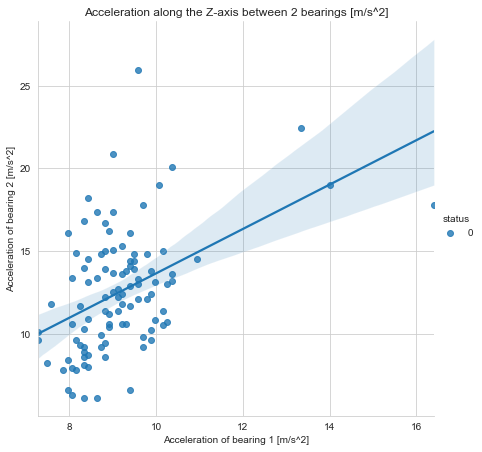

In [15]:
sns.set_style('whitegrid')
sns.lmplot('a1_zmax','a2_zmax',data=df_trans, hue='status',size=6,aspect=1,fit_reg=True)
plt.title('Acceleration along the Z-axis between 2 bearings [m/s^2]')
plt.xlabel('Acceleration of bearing 1 [m/s^2]')
plt.ylabel('Acceleration of bearing 2 [m/s^2]')

In [16]:
df_trans.columns

Index(['timestampmin', 'timestampmax', 'timestampmean', 'timestampstd',
       'timestampmedian', 'a1_xmin', 'a1_xmax', 'a1_xmean', 'a1_xstd',
       'a1_xmedian', 'a1_ymin', 'a1_ymax', 'a1_ymean', 'a1_ystd', 'a1_ymedian',
       'a1_zmin', 'a1_zmax', 'a1_zmean', 'a1_zstd', 'a1_zmedian', 'a2_xmin',
       'a2_xmax', 'a2_xmean', 'a2_xstd', 'a2_xmedian', 'a2_ymin', 'a2_ymax',
       'a2_ymean', 'a2_ystd', 'a2_ymedian', 'a2_zmin', 'a2_zmax', 'a2_zmean',
       'a2_zstd', 'a2_zmedian', 'hzmin', 'hzmax', 'hzmean', 'hzstd',
       'hzmedian', 'wmin', 'wmax', 'wmean', 'wstd', 'wmedian', 'status'],
      dtype='object')

In [105]:
###########
# Functions
###########

def df_drop_column(df,list) ->df:
    df.drop(columns=list,inplace=True)
    print(df.columns)
    return df

def df_features(df,list) ->df:
    # Form the dataFrame for model
    df1 = df[df['status'].values==0]
    df1 = pd.DataFrame(df, columns=list)
    print(df1.columns)
    return df1

def scaler_(df)->df:
    X=df
    X_scale= preprocessing.StandardScaler().fit(X).transform(X)
    return X_scale

def plot_scatter(X_scale,labels,cluster_centers,predict,k,list):
    # plot the model
    print("Silhouette Coefficient: %0.3f"% metrics.silhouette_score(X_scale, labels))
    print('KMeans = ',k)
    
    plt.figure(figsize=(6,4))
    plt.title('KMeans _ 2 features')
    plt.grid(True)
    plt.scatter(X_scale[:,0], X_scale[:,1], c=predict)
    plt.scatter(cluster_centers[:,0],cluster_centers[:,1], marker='X',c='g') # centroides
    plt.xlabel(list[0])
    plt.ylabel(list[1])
    plt.show()

def plot_inertia_syl_coeff(K_range, inertia, syl_coef_):
    
    plt.figure(figsize=(5,3))
    plt.plot(K_range, inertia,label='inertia')
    plt.legend()
    plt.grid(True)
    plt.xlabel('number clusters')
    plt.ylabel('Cost of model (Inertia)')
    plt.show()
    
    plt.figure(figsize=(5,3))
    plt.plot(K_range, syl_coef_,c='g',label='sylhouette_coefficient')
    plt.legend()
    plt.grid(True)
    plt.xlabel('number clusters')
    plt.ylabel('sylhouette coefficience')
    plt.show()

Index(['a1_xmin', 'a1_xmax', 'a1_xmean', 'a1_xstd', 'a1_xmedian', 'a1_ymin',
       'a1_ymax', 'a1_ymean', 'a1_ystd', 'a1_ymedian', 'a1_zmin', 'a1_zmax',
       'a1_zmean', 'a1_zstd', 'a1_zmedian', 'a2_xmin', 'a2_xmax', 'a2_xmean',
       'a2_xstd', 'a2_xmedian', 'a2_ymin', 'a2_ymax', 'a2_ymean', 'a2_ystd',
       'a2_ymedian', 'a2_zmin', 'a2_zmax', 'a2_zmean', 'a2_zstd', 'a2_zmedian',
       'hzmean', 'hzstd', 'hzmedian', 'wmean', 'wstd', 'wmedian'],
      dtype='object')


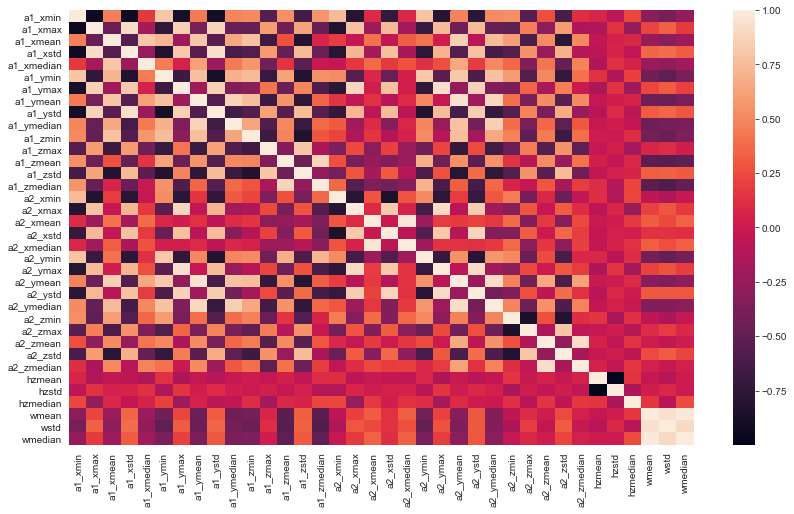

In [54]:
# Observe the correlation of dataFrame
list=['a1_xmin', 'a1_xmax', 'a1_xmean', 'a1_xstd',
       'a1_xmedian', 'a1_ymin', 'a1_ymax', 'a1_ymean', 'a1_ystd', 'a1_ymedian',
       'a1_zmin', 'a1_zmax', 'a1_zmean', 'a1_zstd', 'a1_zmedian', 'a2_xmin',
       'a2_xmax', 'a2_xmean', 'a2_xstd', 'a2_xmedian', 'a2_ymin', 'a2_ymax',
       'a2_ymean', 'a2_ystd', 'a2_ymedian', 'a2_zmin', 'a2_zmax', 'a2_zmean',
       'a2_zstd', 'a2_zmedian', 'hzmean', 'hzstd',
       'hzmedian', 'wmean', 'wstd', 'wmedian']
df_corr = df_features(df_trans,list)
Var_Corr = df_corr.corr()
# plot the heatmap and annotation on it
plt.figure(figsize=(14,8))
#sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=True, cbar='True')
sns.heatmap(Var_Corr, annot=False, cbar='False')
plt.show()

Index(['a1_xmax', 'a1_xstd'], dtype='object')
Silhouette Coefficient: 0.625
KMeans =  2


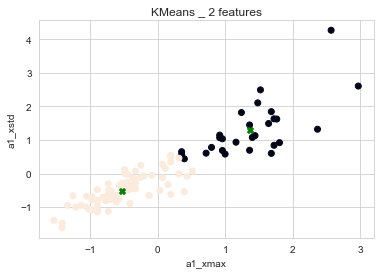

Silhouette Coefficient: 0.494
KMeans =  3


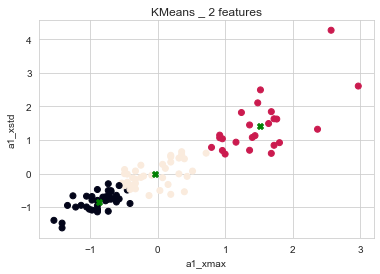

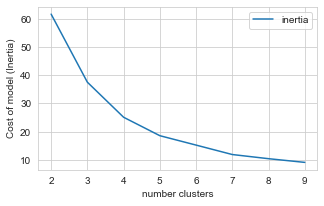

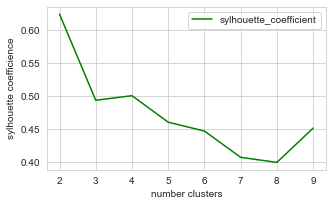

In [106]:
#################################
# gathering of **features** (2) of your **failed** bearing dataset
# Select Features  ['a1_xmax', 'a1_xstd']
#
from sklearn.cluster import KMeans

list= ['a1_xmax', 'a1_xstd']
df_cluster = df_features(df_trans,list)
# Standardizing the dataset
# define X for the models:
X=df_cluster
X_scale= preprocessing.StandardScaler().fit(X).transform(X)
# number of clusters
k = 2

# fit a kmeans object to the dataset
# KMeans: Elbow Methode: determine k on Elbow
inertia = []
syl_coef_ = []
K_range = range(2, 10)
for k in K_range:
    kmeans = KMeans(n_clusters=k, init='k-means++').fit(X_scale)
    # clusters is an attribute of the object
    cluster_centers = kmeans.cluster_centers_
    labels = kmeans.labels_
    predict= kmeans.predict(X_scale) 
    inertia.append(kmeans.inertia_)
    silhouette_coeff=metrics.silhouette_score(X_scale, labels)
    syl_coef_.append(silhouette_coeff)
    if k<4:
        plot_scatter(X_scale,labels,cluster_centers,predict,k,list)
             
plot_inertia_syl_coeff(K_range, inertia, syl_coef_)

Index(['a1_ymax', 'a2_ymax'], dtype='object')
Silhouette Coefficient: 0.670
KMeans =  2


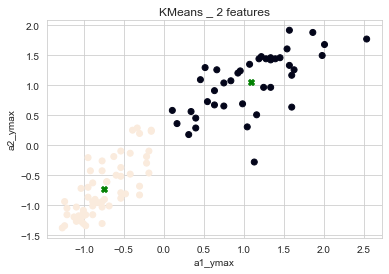

Silhouette Coefficient: 0.540
KMeans =  3


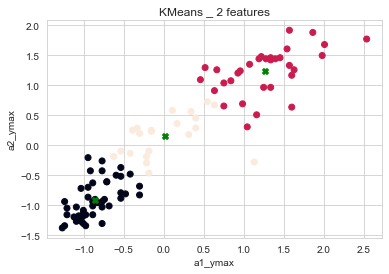

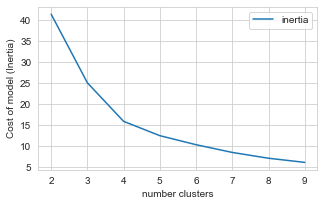

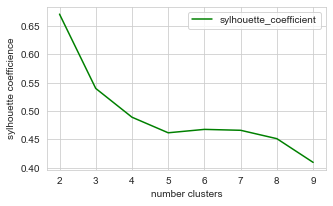

In [107]:
#################################
# gathering of **features** (2) of your **failed** bearing dataset
# Select Features  ['a1_ymax', 'a2_ymax']
#
list= ['a1_ymax', 'a2_ymax']
df_cluster = df_features(df_trans,list)
# Standardizing the dataset
# define X for the models:
X=df_cluster
X_scale= preprocessing.StandardScaler().fit(X).transform(X)
# number of clusters
k = 2

# fit a kmeans object to the dataset
# KMeans: Elbow Methode: determine k on Elbow
inertia = []
syl_coef_ = []
K_range = range(2, 10)
for k in K_range:
    kmeans = KMeans(n_clusters=k, init='k-means++').fit(X_scale)
    # clusters is an attribute of the object
    cluster_centers = kmeans.cluster_centers_
    labels = kmeans.labels_
    predict= kmeans.predict(X_scale) 
    inertia.append(kmeans.inertia_)
    silhouette_coeff=metrics.silhouette_score(X_scale, labels)
    syl_coef_.append(silhouette_coeff)
    if k<4:
        plot_scatter(X_scale,labels,cluster_centers,predict,k,list)
             
plot_inertia_syl_coeff(K_range, inertia, syl_coef_)

Index(['a1_zmax', 'a2_zstd'], dtype='object')
Silhouette Coefficient: 0.724
KMeans =  2


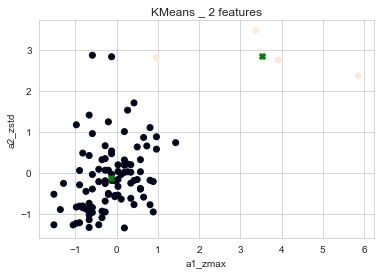

Silhouette Coefficient: 0.375
KMeans =  3


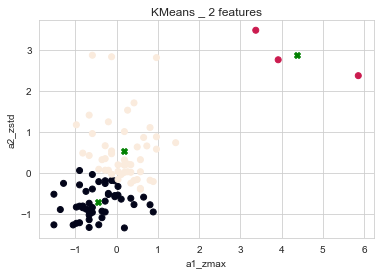

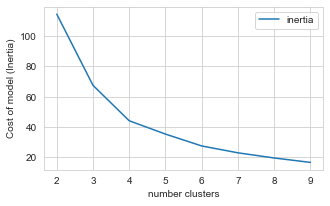

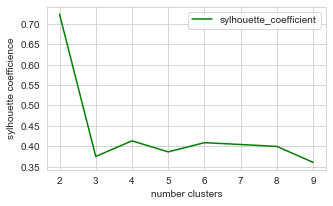

In [108]:
#################################
# gathering of **features** (2) of your **failed** bearing dataset
# Select Features ['a1_zmax', 'a2_zstd']
#
list= ['a1_zmax', 'a2_zstd']
df_cluster = df_features(df_trans,list)
# Standardizing the dataset
# define X for the models:
X=df_cluster
X_scale= preprocessing.StandardScaler().fit(X).transform(X)
# number of clusters
k = 4

# fit a kmeans object to the dataset
# KMeans: Elbow Methode: determine k on Elbow
inertia = []
syl_coef_ = []
K_range = range(2, 10)
for k in K_range:
    kmeans = KMeans(n_clusters=k, init='k-means++').fit(X_scale)
    # clusters is an attribute of the object
    cluster_centers = kmeans.cluster_centers_
    labels = kmeans.labels_
    predict= kmeans.predict(X_scale) 
    inertia.append(kmeans.inertia_)
    silhouette_coeff=metrics.silhouette_score(X_scale, labels)
    syl_coef_.append(silhouette_coeff)
    if k<4:
        plot_scatter(X_scale,labels,cluster_centers,predict,k,list)
             
plot_inertia_syl_coeff(K_range, inertia, syl_coef_)

Index(['wstd', 'wmedian'], dtype='object')
Silhouette Coefficient: 0.658
KMeans =  2


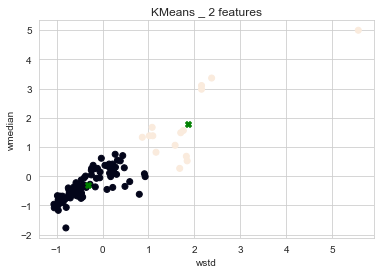

Silhouette Coefficient: 0.531
KMeans =  3


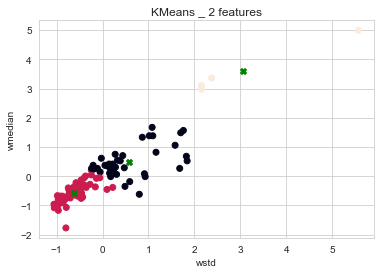

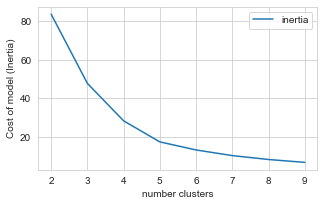

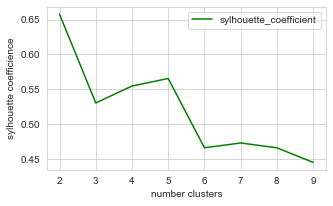

In [109]:
#################################
# gathering of **features** (2) of your **failed** bearing dataset
# Select Features  ['wstd', 'wmedian']
#
list= ['wstd', 'wmedian']
df_cluster = df_features(df_trans,list)
# Standardizing the dataset
# define X for the models:
X=df_cluster
X_scale= preprocessing.StandardScaler().fit(X).transform(X)
# number of clusters
k = 2

# fit a kmeans object to the dataset
# KMeans: Elbow Methode: determine k on Elbow
inertia = []
syl_coef_ = []
K_range = range(2, 10)
for k in K_range:
    kmeans = KMeans(n_clusters=k, init='k-means++').fit(X_scale)
    # clusters is an attribute of the object
    cluster_centers = kmeans.cluster_centers_
    labels = kmeans.labels_
    predict= kmeans.predict(X_scale) 
    inertia.append(kmeans.inertia_)
    silhouette_coeff=metrics.silhouette_score(X_scale, labels)
    syl_coef_.append(silhouette_coeff)
    if k<4:
        plot_scatter(X_scale,labels,cluster_centers,predict,k,list)
             
plot_inertia_syl_coeff(K_range, inertia, syl_coef_)

Index(['wmean', 'wstd'], dtype='object')
Silhouette Coefficient: 0.673
KMeans =  2


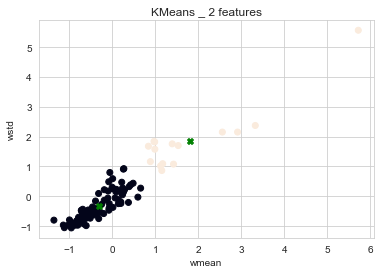

Silhouette Coefficient: 0.541
KMeans =  3


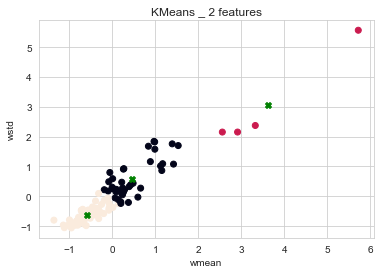

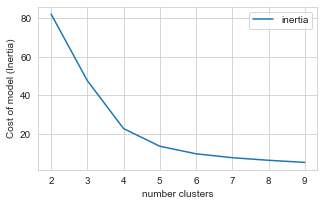

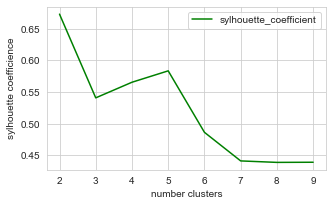

In [110]:
#################################
# gathering of **features** (2) of your **failed** bearing dataset
# Select Features  ['wmean', 'wstd']
# 
list= ['wmean', 'wstd']
df_cluster = df_features(df_trans,list)
# Standardizing the dataset
# define X for the models:
X=df_cluster
X_scale= preprocessing.StandardScaler().fit(X).transform(X)
# number of clusters
k = 3

# fit a kmeans object to the dataset
# KMeans: Elbow Methode: determine k on Elbow
inertia = []
syl_coef_ = []
K_range = range(2, 10)
for k in K_range:
    kmeans = KMeans(n_clusters=k, init='k-means++').fit(X_scale)
    # clusters is an attribute of the object
    cluster_centers = kmeans.cluster_centers_
    labels = kmeans.labels_
    predict= kmeans.predict(X_scale) 
    inertia.append(kmeans.inertia_)
    silhouette_coeff=metrics.silhouette_score(X_scale, labels)
    syl_coef_.append(silhouette_coeff)
    if k<4:
        plot_scatter(X_scale,labels,cluster_centers,predict,k,list)
             
plot_inertia_syl_coeff(K_range, inertia, syl_coef_)

Index(['wmean', 'wmedian'], dtype='object')
Silhouette Coefficient: 0.693
KMeans =  2


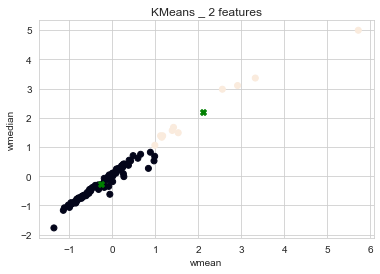

Silhouette Coefficient: 0.578
KMeans =  3


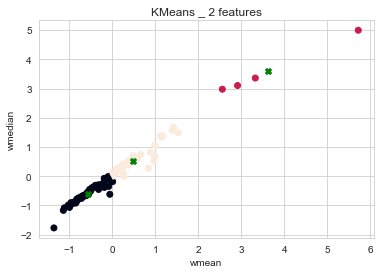

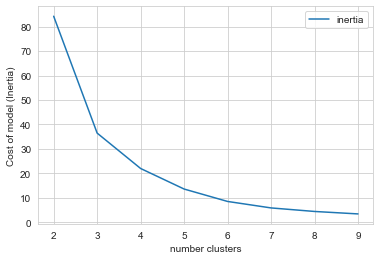

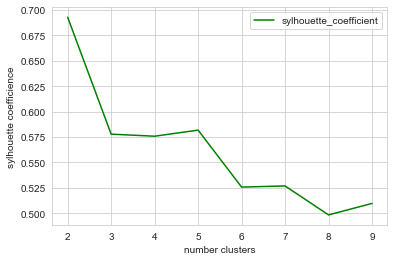

In [94]:
#################################
# gathering of **features** (2) of your **failed** bearing dataset
# Select Features   ['wmean', 'wmedian']
# 
list= ['wmean', 'wmedian']
df_cluster = df_features(df_trans,list)
# Standardizing the dataset
# define X for the models:
X=df_cluster
X_scale= preprocessing.StandardScaler().fit(X).transform(X)
# number of clusters
k = 2

# fit a kmeans object to the dataset
# KMeans: Elbow Methode: determine k on Elbow
inertia = []
syl_coef_ = []
K_range = range(2, 10)
for k in K_range:
    kmeans = KMeans(n_clusters=k, init='k-means++').fit(X_scale)
    # clusters is an attribute of the object
    cluster_centers = kmeans.cluster_centers_
    labels = kmeans.labels_
    predict= kmeans.predict(X_scale) 
    inertia.append(kmeans.inertia_)
    silhouette_coeff=metrics.silhouette_score(X_scale, labels)
    syl_coef_.append(silhouette_coeff)
    if k<4:
        plot_scatter(X_scale,labels,cluster_centers,predict,k,list)
             
plot_inertia_syl_coeff(K_range, inertia, syl_coef_)

Index(['a2_ymin', 'a2_ymax'], dtype='object')
Silhouette Coefficient: 0.534
KMeans =  2


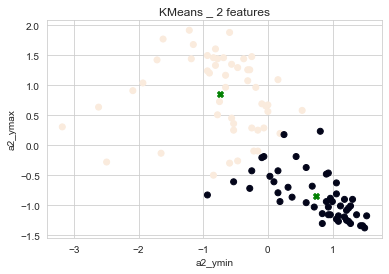

Silhouette Coefficient: 0.492
KMeans =  3


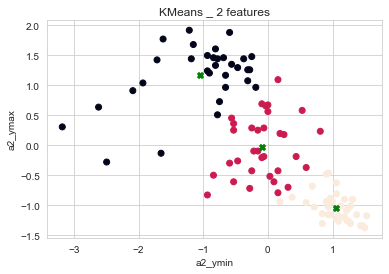

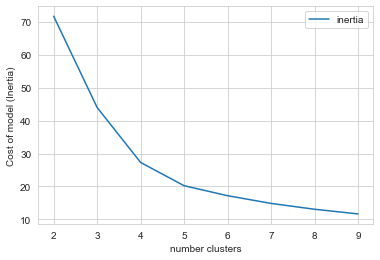

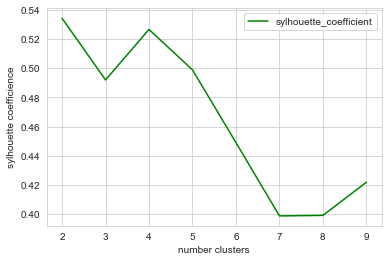

In [95]:
#################################
# gathering of **features** (2) of your **failed** bearing dataset
# Select Features   ['a2_ymin', 'a2_ymax']
# 
list= ['a2_ymin', 'a2_ymax']
df_cluster = df_features(df_trans,list)
# Standardizing the dataset
# define X for the models:
X=df_cluster
X_scale= preprocessing.StandardScaler().fit(X).transform(X)
# number of clusters
k = 2

# fit a kmeans object to the dataset
# KMeans: Elbow Methode: determine k on Elbow
inertia = []
syl_coef_ = []
K_range = range(2, 10)
for k in K_range:
    kmeans = KMeans(n_clusters=k, init='k-means++').fit(X_scale)
    # clusters is an attribute of the object
    cluster_centers = kmeans.cluster_centers_
    labels = kmeans.labels_
    predict= kmeans.predict(X_scale) 
    inertia.append(kmeans.inertia_)
    silhouette_coeff=metrics.silhouette_score(X_scale, labels)
    syl_coef_.append(silhouette_coeff)
    if k<4:
        plot_scatter(X_scale,labels,cluster_centers,predict,k,list)
             
plot_inertia_syl_coeff(K_range, inertia, syl_coef_)

Index(['a2_ymedian', 'a2_ystd'], dtype='object')
Silhouette Coefficient: 0.486
KMeans =  2


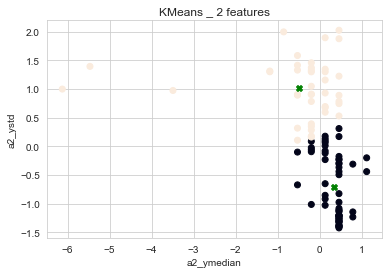

Silhouette Coefficient: 0.544
KMeans =  3


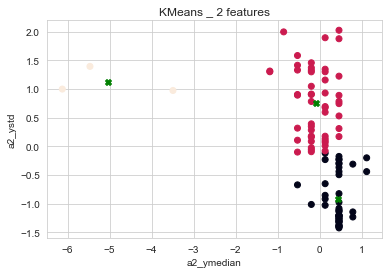

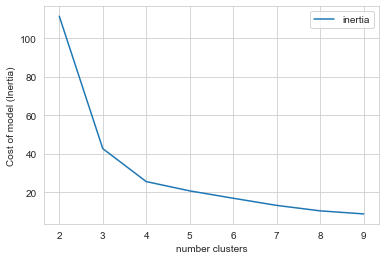

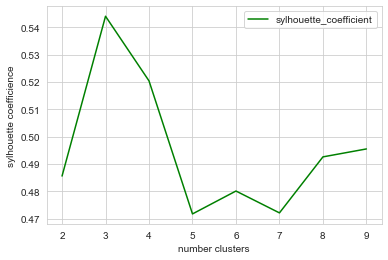

In [96]:
#################################
# gathering of **features** (2) of your **failed** bearing dataset
# Select Features   ['a2_median', 'a2_ystd']
# 
list= ['a2_ymedian', 'a2_ystd']
df_cluster = df_features(df_trans,list)
# Standardizing the dataset
# define X for the models:
X=df_cluster
X_scale= preprocessing.StandardScaler().fit(X).transform(X)
# number of clusters
k = 2

# fit a kmeans object to the dataset
# KMeans: Elbow Methode: determine k on Elbow
inertia = []
syl_coef_ = []
K_range = range(2, 10)
for k in K_range:
    kmeans = KMeans(n_clusters=k, init='k-means++').fit(X_scale)
    # clusters is an attribute of the object
    cluster_centers = kmeans.cluster_centers_
    labels = kmeans.labels_
    predict= kmeans.predict(X_scale) 
    inertia.append(kmeans.inertia_)
    silhouette_coeff=metrics.silhouette_score(X_scale, labels)
    syl_coef_.append(silhouette_coeff)
    if k<4:
        plot_scatter(X_scale,labels,cluster_centers,predict,k,list)
             
plot_inertia_syl_coeff(K_range, inertia, syl_coef_)

Index(['a2_ymean', 'a2_ystd'], dtype='object')
Silhouette Coefficient: 0.789
KMeans =  2


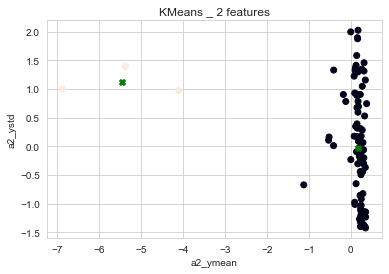

Silhouette Coefficient: 0.566
KMeans =  3


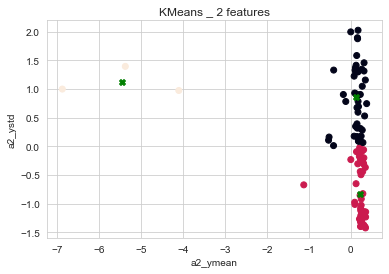

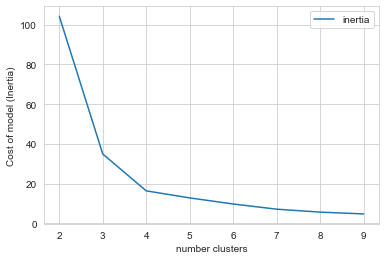

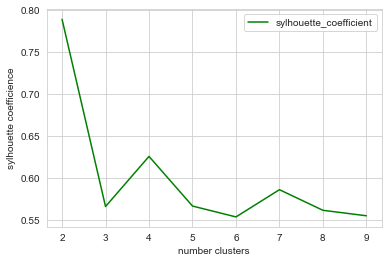

In [97]:
#################################
# gathering of **features** (2) of your **failed** bearing dataset
# Select Features   ['a2_ymean', 'a2_ystd']
# 
list= ['a2_ymean', 'a2_ystd']
df_cluster = df_features(df_trans,list)
# Standardizing the dataset
# define X for the models:
X=df_cluster
X_scale= preprocessing.StandardScaler().fit(X).transform(X)
# number of clusters
k = 2

# fit a kmeans object to the dataset
# KMeans: Elbow Methode: determine k on Elbow
inertia = []
syl_coef_ = []
K_range = range(2, 10)
for k in K_range:
    kmeans = KMeans(n_clusters=k, init='k-means++').fit(X_scale)
    # clusters is an attribute of the object
    cluster_centers = kmeans.cluster_centers_
    labels = kmeans.labels_
    predict= kmeans.predict(X_scale) 
    inertia.append(kmeans.inertia_)
    silhouette_coeff=metrics.silhouette_score(X_scale, labels)
    syl_coef_.append(silhouette_coeff)
    if k<4:
        plot_scatter(X_scale,labels,cluster_centers,predict,k,list)
             
plot_inertia_syl_coeff(K_range, inertia, syl_coef_)

Index(['a1_xmax', 'a1_ymax', 'a1_xstd'], dtype='object')


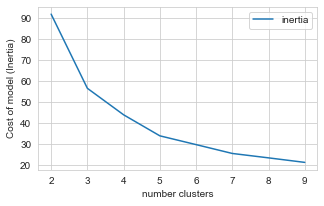

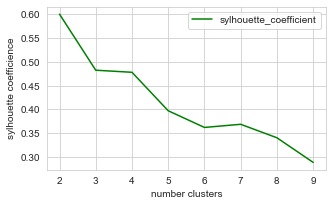

In [111]:
#################################
# gathering of **features** (3) of your **failed** bearing dataset
# Select Features ['a1_xmax','a1_ymax', 'a1_xstd']
# 
list= ['a1_xmax','a1_ymax', 'a1_xstd']
df_cluster = df_features(df_trans,list)
# Standardizing the dataset
# define X for the models:
X=df_cluster
X_scale= preprocessing.StandardScaler().fit(X).transform(X)
# number of clusters
clusters = 2

# fit a kmeans object to the dataset
# KMeans: Elbow Methode: determine k on Elbow
inertia = []
syl_coef_ = []
K_range = range(2, 10)
for k in K_range:
    kmeans = KMeans(n_clusters=k, init='k-means++').fit(X_scale)
    # clusters is an attribute of the object
    cluster_centers = kmeans.cluster_centers_
    labels = kmeans.labels_
    predict= kmeans.predict(X_scale) 
    inertia.append(kmeans.inertia_)
    silhouette_coeff=metrics.silhouette_score(X_scale, labels)
    syl_coef_.append(silhouette_coeff)
   
plot_inertia_syl_coeff(K_range, inertia, syl_coef_)

Index(['a1_xmax', 'a1_ymax', 'a1_zmax'], dtype='object')


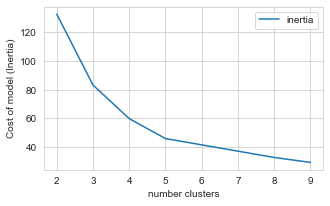

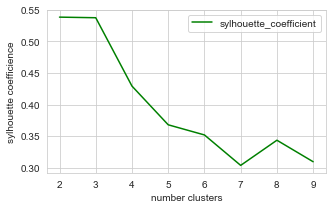

In [112]:
#################################
# gathering of **features** (3) of your **failed** bearing dataset
# Select Features ['a1_xmax','a1_ymax', 'a1_zmax']
# 
list= ['a1_xmax','a1_ymax', 'a1_zmax']
df_cluster = df_features(df_trans,list)
# Standardizing the dataset
# define X for the models:
X=df_cluster
X_scale= preprocessing.StandardScaler().fit(X).transform(X)
# number of clusters
clusters = 2

# fit a kmeans object to the dataset
# KMeans: Elbow Methode: determine k on Elbow
inertia = []
syl_coef_ = []
K_range = range(2, 10)
for k in K_range:
    kmeans = KMeans(n_clusters=k, init='k-means++').fit(X_scale)
    # clusters is an attribute of the object
    cluster_centers = kmeans.cluster_centers_
    labels = kmeans.labels_
    predict= kmeans.predict(X_scale) 
    inertia.append(kmeans.inertia_)
    silhouette_coeff=metrics.silhouette_score(X_scale, labels)
    syl_coef_.append(silhouette_coeff)
   
plot_inertia_syl_coeff(K_range, inertia, syl_coef_)

Index(['a1_xmax', 'a1_ymax', 'a2_ymax'], dtype='object')


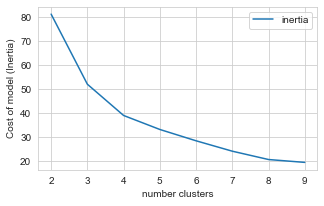

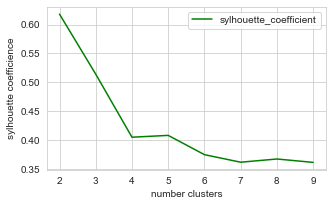

In [113]:
#################################
# gathering of **features** (3) of your **failed** bearing dataset
# Select Features ['a1_xmax','a1_ymax', 'a2_ymax']
# 
list= ['a1_xmax','a1_ymax', 'a2_ymax']
df_cluster = df_features(df_trans,list)
# Standardizing the dataset
# define X for the models:
X=df_cluster
X_scale= preprocessing.StandardScaler().fit(X).transform(X)
# number of clusters
clusters = 2

# fit a kmeans object to the dataset
# KMeans: Elbow Methode: determine k on Elbow
inertia = []
syl_coef_ = []
K_range = range(2, 10)
for k in K_range:
    kmeans = KMeans(n_clusters=k, init='k-means++').fit(X_scale)
    # clusters is an attribute of the object
    cluster_centers = kmeans.cluster_centers_
    labels = kmeans.labels_
    predict= kmeans.predict(X_scale) 
    inertia.append(kmeans.inertia_)
    silhouette_coeff=metrics.silhouette_score(X_scale, labels)
    syl_coef_.append(silhouette_coeff)
   
plot_inertia_syl_coeff(K_range, inertia, syl_coef_)

Index(['a1_xmax', 'a1_ymax', 'a1_xstd', 'a2_ymax'], dtype='object')


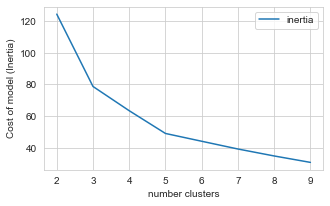

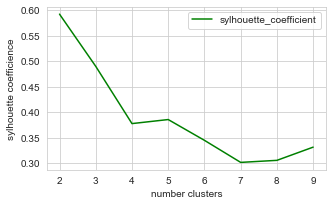

In [114]:
#################################
# gathering of **features** (4) of your **failed** bearing dataset
# Select Features  ['a1_xmax','a1_ymax', 'a1_xstd', 'a2_ymax']
# 
list=  ['a1_xmax','a1_ymax', 'a1_xstd', 'a2_ymax']
df_cluster = df_features(df_trans,list)
# Standardizing the dataset
# define X for the models:
X=df_cluster
X_scale= preprocessing.StandardScaler().fit(X).transform(X)
# number of clusters
clusters = 2

# fit a kmeans object to the dataset
# KMeans: Elbow Methode: determine k on Elbow
inertia = []
syl_coef_ = []
K_range = range(2, 10)
for k in K_range:
    kmeans = KMeans(n_clusters=k, init='k-means++').fit(X_scale)
    # clusters is an attribute of the object
    cluster_centers = kmeans.cluster_centers_
    labels = kmeans.labels_
    predict= kmeans.predict(X_scale) 
    inertia.append(kmeans.inertia_)
    silhouette_coeff=metrics.silhouette_score(X_scale, labels)
    syl_coef_.append(silhouette_coeff)
   
plot_inertia_syl_coeff(K_range, inertia, syl_coef_)

Index(['a1_ymean', 'a1_ymax', 'a2_ymax', 'a2_ymean', 'wmedian'], dtype='object')


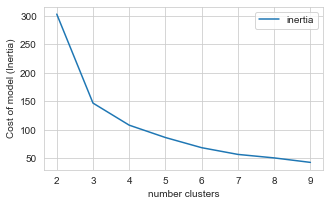

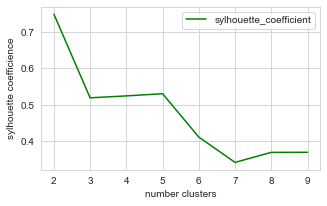

In [115]:
#################################
# gathering of **features** (5) of your **failed** bearing dataset
# Select Features ['a1_ymean', 'a1_ymax', 'a2_ymax', 'a2_ymean', 'wmedian']
# 
list= ['a1_ymean','a1_ymax','a2_ymax','a2_ymean', 'wmedian']
df_cluster = df_features(df_trans,list)
# Standardizing the dataset
# define X for the models:
X=df_cluster
X_scale= preprocessing.StandardScaler().fit(X).transform(X)
# number of clusters
k = 2

# fit a kmeans object to the dataset
# KMeans: Elbow Methode: determine k on Elbow
inertia = []
syl_coef_ = []
K_range = range(2, 10)
for k in K_range:
    kmeans = KMeans(n_clusters=k, init='k-means++').fit(X_scale)
    # clusters is an attribute of the object
    cluster_centers = kmeans.cluster_centers_
    labels = kmeans.labels_
    predict= kmeans.predict(X_scale) 
    inertia.append(kmeans.inertia_)
    silhouette_coeff=metrics.silhouette_score(X_scale, labels)
    syl_coef_.append(silhouette_coeff)
   
plot_inertia_syl_coeff(K_range, inertia, syl_coef_)

Index(['a1_ymean', 'a1_ymax', 'a2_ymax', 'a2_ymean', 'wstd'], dtype='object')


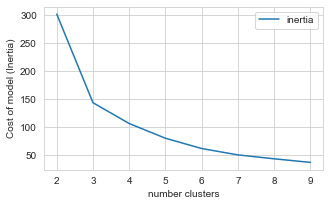

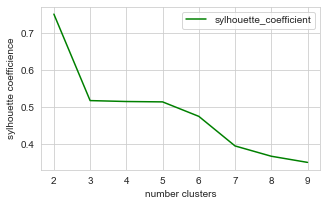

In [116]:
#################################
# gathering of **features** (5) of your **failed** bearing dataset
# Select Features ['a1_ymean','a1_ymax','a2_ymax','a2_ymean', 'wstd']
# 
list= ['a1_ymean','a1_ymax','a2_ymax','a2_ymean', 'wstd']
df_cluster = df_features(df_trans,list)
# Standardizing the dataset
# define X for the models:
X=df_cluster
X_scale= preprocessing.StandardScaler().fit(X).transform(X)
# number of clusters
clusters = 2

# fit a kmeans object to the dataset
# KMeans: Elbow Methode: determine k on Elbow
inertia = []
syl_coef_ = []
K_range = range(2, 10)
for k in K_range:
    kmeans = KMeans(n_clusters=k, init='k-means++').fit(X_scale)
    # clusters is an attribute of the object
    cluster_centers = kmeans.cluster_centers_
    labels = kmeans.labels_
    predict= kmeans.predict(X_scale) 
    inertia.append(kmeans.inertia_)
    silhouette_coeff=metrics.silhouette_score(X_scale, labels)
    syl_coef_.append(silhouette_coeff)
   
plot_inertia_syl_coeff(K_range, inertia, syl_coef_)

In [34]:
'''
Index(['timestampmin', 'timestampmax', 'timestampmean', 'timestampstd',
       'timestampmedian', 'a1_xmin', 'a1_xmax', 'a1_xmean', 'a1_xstd',
       'a1_xmedian', 'a1_ymin', 'a1_ymax', 'a1_ymean', 'a1_ystd', 'a1_ymedian',
       'a1_zmin', 'a1_zmax', 'a1_zmean', 'a1_zstd', 'a1_zmedian', 'a2_xmin',
       'a2_xmax', 'a2_xmean', 'a2_xstd', 'a2_xmedian', 'a2_ymin', 'a2_ymax',
       'a2_ymean', 'a2_ystd', 'a2_ymedian', 'a2_zmin', 'a2_zmax', 'a2_zmean',
       'a2_zstd', 'a2_zmedian', 'hzmin', 'hzmax', 'hzmean', 'hzstd',
       'hzmedian', 'wmin', 'wmax', 'wmean', 'wstd', 'wmedian', 'status']
      '''

"\nIndex(['timestampmin', 'timestampmax', 'timestampmean', 'timestampstd',\n       'timestampmedian', 'a1_xmin', 'a1_xmax', 'a1_xmean', 'a1_xstd',\n       'a1_xmedian', 'a1_ymin', 'a1_ymax', 'a1_ymean', 'a1_ystd', 'a1_ymedian',\n       'a1_zmin', 'a1_zmax', 'a1_zmean', 'a1_zstd', 'a1_zmedian', 'a2_xmin',\n       'a2_xmax', 'a2_xmean', 'a2_xstd', 'a2_xmedian', 'a2_ymin', 'a2_ymax',\n       'a2_ymean', 'a2_ystd', 'a2_ymedian', 'a2_zmin', 'a2_zmax', 'a2_zmean',\n       'a2_zstd', 'a2_zmedian', 'hzmin', 'hzmax', 'hzmean', 'hzstd',\n       'hzmedian', 'wmin', 'wmax', 'wmean', 'wstd', 'wmedian', 'status']\n      "

Index(['a1_ymean', 'a1_ymax', 'a2_ymax', 'a2_ymean', 'wstd', 'wmedian'], dtype='object')


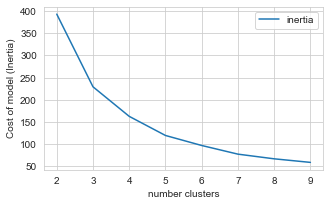

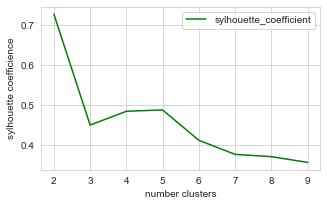

In [123]:
#################################
# gathering of **features** (6) of your **failed** bearing dataset
# Select Features ['a1_ymean','a1_ymax','a2_ymax','a2_ymean','wstd','wmedian']
# 
list= ['a1_ymean','a1_ymax','a2_ymax','a2_ymean','wstd','wmedian']
df_cluster = df_features(df_trans,list)
# Standardizing the dataset
# define X for the models:
X=df_cluster
X_scale= preprocessing.StandardScaler().fit(X).transform(X)
# number of clusters
clusters = 2

# fit a kmeans object to the dataset
# KMeans: Elbow Methode: determine k on Elbow
inertia = []
syl_coef_ = []
K_range = range(2, 10)
for k in K_range:
    kmeans = KMeans(n_clusters=k, init='k-means++').fit(X_scale)
    # clusters is an attribute of the object
    cluster_centers = kmeans.cluster_centers_
    labels = kmeans.labels_
    predict= kmeans.predict(X_scale) 
    inertia.append(kmeans.inertia_)
    silhouette_coeff=metrics.silhouette_score(X_scale, labels)
    syl_coef_.append(silhouette_coeff)
   
plot_inertia_syl_coeff(K_range, inertia, syl_coef_)

Index(['a1_ymean', 'a1_ystd', 'a2_ystd', 'a2_ymean', 'a1_ymedian',
       'a2_ymedian'],
      dtype='object')


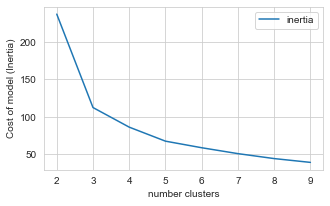

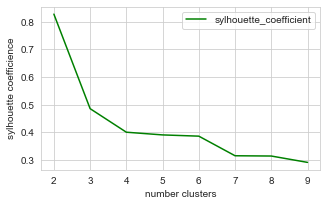

In [124]:
#################################
# gathering of **features** (6) of your **failed** bearing dataset
# Select Features ['a1_ymean', 'a1_ystd', 'a2_ystd', 'a2_ymean', 'a1_ymedian',
#                  'a2_ymedian']
# 
list= ['a1_ymean','a1_ystd','a2_ystd','a2_ymean','a1_ymedian','a2_ymedian']
df_cluster = df_features(df_trans,list)
# Standardizing the dataset
# define X for the models:
X=df_cluster
X_scale= preprocessing.StandardScaler().fit(X).transform(X)
# number of clusters
clusters = 2

# fit a kmeans object to the dataset
# KMeans: Elbow Methode: determine k on Elbow
inertia = []
syl_coef_ = []
K_range = range(2, 10)
for k in K_range:
    kmeans = KMeans(n_clusters=k, init='k-means++').fit(X_scale)
    # clusters is an attribute of the object
    cluster_centers = kmeans.cluster_centers_
    labels = kmeans.labels_
    predict= kmeans.predict(X_scale) 
    inertia.append(kmeans.inertia_)
    silhouette_coeff=metrics.silhouette_score(X_scale, labels)
    syl_coef_.append(silhouette_coeff)
   
plot_inertia_syl_coeff(K_range, inertia, syl_coef_)

Index(['a1_xmax', 'a1_ymax', 'a1_zmax', 'a1_ystd', 'wmean', 'wstd'], dtype='object')


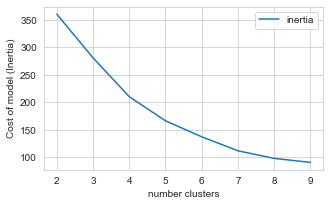

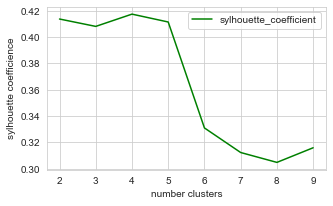

In [125]:
#################################
# gathering of **features** (6) of your **failed** bearing dataset
# Select Features ['a1_xmax','a1_ymax','a1_zmax','a1_ystd','wmean','wstd']
# 
#
list= ['a1_xmax','a1_ymax','a1_zmax','a1_ystd','wmean','wstd']
df_cluster = df_features(df_trans,list)
# Standardizing the dataset
# define X for the models:
X=df_cluster
X_scale= preprocessing.StandardScaler().fit(X).transform(X)
# number of clusters
clusters = 2

# fit a kmeans object to the dataset
# KMeans: Elbow Methode: determine k on Elbow
inertia = []
syl_coef_ = []
K_range = range(2, 10)
for k in K_range:
    kmeans = KMeans(n_clusters=k, init='k-means++').fit(X_scale)
    # clusters is an attribute of the object
    cluster_centers = kmeans.cluster_centers_
    labels = kmeans.labels_
    predict= kmeans.predict(X_scale) 
    inertia.append(kmeans.inertia_)
    silhouette_coeff=metrics.silhouette_score(X_scale, labels)
    syl_coef_.append(silhouette_coeff)

plot_inertia_syl_coeff(K_range, inertia, syl_coef_)


Index(['a2_xmax', 'a2_ymax', 'a2_zmax', 'a2_ystd', 'wmean', 'wstd'], dtype='object')


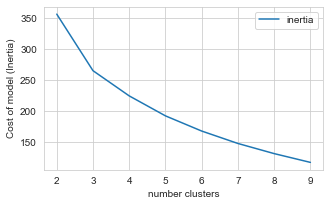

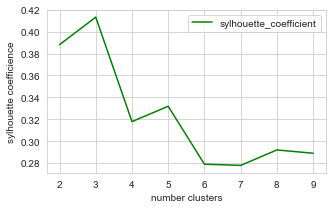

In [126]:
#################################
# gathering of **features** (6) of your **failed** bearing dataset
# Select Features ['a2_xmax','a2_ymax','a2_zmax','a2_ystd','wmean','wstd']
# 
#
list= ['a2_xmax','a2_ymax','a2_zmax','a2_ystd','wmean','wstd']
df_cluster = df_features(df_trans,list)
# Standardizing the dataset
# define X for the models:
X=df_cluster
X_scale= preprocessing.StandardScaler().fit(X).transform(X)
# number of clusters
clusters = 2

# fit a kmeans object to the dataset
# KMeans: Elbow Methode: determine k on Elbow
inertia = []
syl_coef_ = []
K_range = range(2, 10)
for k in K_range:
    kmeans = KMeans(n_clusters=k, init='k-means++').fit(X_scale)
    # clusters is an attribute of the object
    cluster_centers = kmeans.cluster_centers_
    labels = kmeans.labels_
    predict= kmeans.predict(X_scale) 
    inertia.append(kmeans.inertia_)
    silhouette_coeff=metrics.silhouette_score(X_scale, labels)
    syl_coef_.append(silhouette_coeff)

plot_inertia_syl_coeff(K_range, inertia, syl_coef_)


Index(['a1_xmax', 'a1_ymax', 'a1_xstd', 'a1_ystd', 'wmean', 'wstd'], dtype='object')


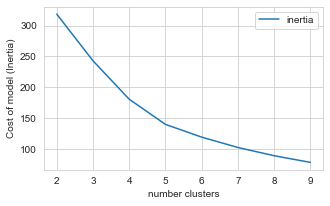

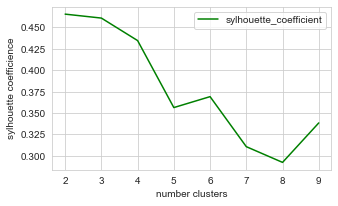

In [128]:
#################################
# gathering of **features** (6) of your **failed** bearing dataset
# Select Features ['a1_xmax','a1_ymax','a1_xstd','a1_ystd','wmean','wstd']
# 
list= ['a1_xmax','a1_ymax','a1_xstd','a1_ystd','wmean','wstd']
df_cluster = df_features(df_trans,list)
# Standardizing the dataset
# define X for the models:
X=df_cluster
X_scale= preprocessing.StandardScaler().fit(X).transform(X)
# number of clusters
clusters = 2

# fit a kmeans object to the dataset
# KMeans: Elbow Methode: determine k on Elbow
inertia = []
syl_coef_ = []
K_range = range(2, 10)
for k in K_range:
    kmeans = KMeans(n_clusters=k, init='k-means++').fit(X_scale)
    # clusters is an attribute of the object
    cluster_centers = kmeans.cluster_centers_
    labels = kmeans.labels_
    predict= kmeans.predict(X_scale) 
    inertia.append(kmeans.inertia_)
    silhouette_coeff=metrics.silhouette_score(X_scale, labels)
    syl_coef_.append(silhouette_coeff)

plot_inertia_syl_coeff(K_range, inertia, syl_coef_)


In [40]:
###########################
# We see that the curves Inertia/k and sylhouette_coeff/k most of time follow the same form. We chose the best with:
# We are looking for the compromise betweens Inertia/k and sylhouette_coeff/k, we choose:
#  * k=4 with features:
#  *['a1_ymean','a1_ymax','a2_ymax','a2_ymean','wstd','wmedian']
#
############################

In [133]:
#DBSCAN : density-based clustering technique
#from sklearn import preprocessing
#from sklearn import metrics
from sklearn.cluster import DBSCAN
import numpy as np

# Select Features ['a1_xmax','a1_ymax','a1_xstd','a1_ystd','wmean','wstd']
# 
list= ['a1_ymean','a1_ymax','a2_ymax','a2_ymean','wstd','wmedian']
df_cluster = df_features(df_trans,list)
# Standardizing the dataset
# define X for the models:
X=df_cluster
X_scale= preprocessing.StandardScaler().fit(X).transform(X)

# Compute DBSCAN
dbsc = DBSCAN(eps = .5, min_samples = 10).fit(X_scale)
labels = dbsc.labels_
core_samples = np.zeros_like(labels, dtype = bool)
core_samples[dbsc.core_sample_indices_] = True

#print(labels)
#print(core_samples)

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = labels.tolist().count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X_scale, labels))



Index(['a1_ymean', 'a1_ymax', 'a2_ymax', 'a2_ymean', 'wstd', 'wmedian'], dtype='object')
Estimated number of clusters: 1
Estimated number of noise points: 74
Silhouette Coefficient: 0.205


Index(['a1_ymean', 'a1_ymax', 'a2_ymax', 'a2_ymean', 'wstd', 'wmedian'], dtype='object')
Estimated number of clusters: 2
Estimated number of noise points: 0
Silhouette Coefficient: 0.390
Estimated number of clusters: 3
Estimated number of noise points: 0
Silhouette Coefficient: 0.378
Estimated number of clusters: 4
Estimated number of noise points: 0
Silhouette Coefficient: 0.192
Estimated number of clusters: 5
Estimated number of noise points: 0
Silhouette Coefficient: 0.124
Estimated number of clusters: 6
Estimated number of noise points: 0
Silhouette Coefficient: 0.116
Estimated number of clusters: 7
Estimated number of noise points: 0
Silhouette Coefficient: 0.079
Estimated number of clusters: 8
Estimated number of noise points: 0
Silhouette Coefficient: 0.052
Estimated number of clusters: 9
Estimated number of noise points: 0
Silhouette Coefficient: 0.074


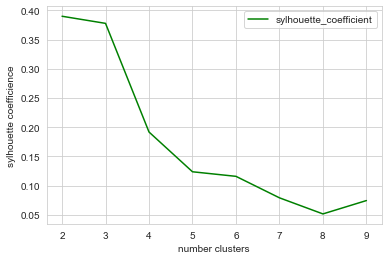

In [132]:
#SpectralClustering :
from sklearn.cluster import SpectralClustering

# Select Features ['a1_ymean','a1_ymax','a2_ymax','a2_ymean','wstd','wmedian']
# 
list= ['a1_ymean','a1_ymax','a2_ymax','a2_ymean','wstd','wmedian']
df_cluster = df_features(df_trans,list)
# Standardizing the dataset
# define X for the models:
X = df_cluster
X_scale = preprocessing.StandardScaler().fit(X).transform(X)

syl_coef_ = []
K_range = range(2, 10)
for k in K_range:
    clustering = SpectralClustering(n_clusters=k, 
                                assign_labels='discretize',
                                random_state=0).fit(X)
    labels = clustering.labels_
    #print(labels)

    # Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = labels.tolist().count(-1)
    silhouette_coeff=metrics.silhouette_score(X_scale, labels)
    syl_coef_.append(silhouette_coeff)
    print('Estimated number of clusters: %d' % n_clusters_)
    print('Estimated number of noise points: %d' % n_noise_)
    print("Silhouette Coefficient: %0.3f"% metrics.silhouette_score(X_scale, labels))
plt.plot(K_range, syl_coef_,c='g',label='sylhouette_coefficient')
plt.legend()
plt.grid(True)
plt.xlabel('number clusters')
plt.ylabel('sylhouette coefficience')
plt.show()


In [134]:
#AgglomerativeClustering : Hierarchical clustering is a general family of clustering algorithms that build nested clusters by merging or splitting them successively
from sklearn.cluster import AgglomerativeClustering

# Select Features ['a1_ymean','a1_ymax','a2_ymax','a2_ymean','wstd','wmedian']
# 
list= ['a1_ymean','a1_ymax','a2_ymax','a2_ymean','wstd','wmedian']
df_cluster = df_features(df_trans,list)
# Standardizing the dataset
# define X for the models:
X = df_cluster
X_scale = preprocessing.StandardScaler().fit(X).transform(X)

clustering = AgglomerativeClustering().fit(X_scale)
labels = clustering.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
#n_noise_ = list(labels).count(-1)
n_noise_ = labels.tolist().count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

print("Silhouette Coefficient: %0.3f"% metrics.silhouette_score(X_scale, labels))


Index(['a1_ymean', 'a1_ymax', 'a2_ymax', 'a2_ymean', 'wstd', 'wmedian'], dtype='object')
Estimated number of clusters: 2
Estimated number of noise points: 0
Silhouette Coefficient: 0.728
